<a href="https://colab.research.google.com/github/Thofa90/Customer-Sign-Up-Behaviour-Data-Quality-Audit/blob/main/Week_1_Project_DA_for_Business_Insights_Uptrail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Week 1 - Project: Data Analysis for Business Insights**



# **Project Title: Customer Sign-Up Behaviour & Data Quality Audit**

**Project Scenario**

You’ve just joined the Business Intelligence team at Rapid Scale, a fast-growing SaaS
company offering tiered subscription plans. Every month, your team supports the Monthly
Business Review (MBR) meeting by analysing user behaviour data.
Your manager has shared a recent customer sign-up dataset and asked you to complete a
data quality audit and provide insights into user acquisition trends. This report will help the
Marketing and Onboarding teams optimise their campaigns and engagement workflows.

**They’re particularly interested in:**

• Identifying where the data may be inaccurate or incomplete

• Understanding how users are signing up and which plans they’re choosing

• Assessing marketing opt-in behaviour and demographics

# **Tasks**

## **1. Load & Clean the Data**

In [ ]:
# Loading the dataset from google drive (mount google drive, define path, load csv)

from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Datasets/customer_signups.csv"

import pandas as pd

df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


### **1.1 Identify missing values, data types, and column structure**

In [ ]:
# Identify missing values, data types, and column structure

# Basic sanity check
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
count,298,291,266,298,291,270,292,290,288,292
unique,298,291,265,295,7,5,8,3,11,7
top,CUST00299,Mr. Bruce Bridges,lisa11@mailhub.org,not a date,YouTube,North,Premium,No,40,Other
freq,1,1,2,4,58,65,57,156,50,59


**1️⃣ Column structure & Data Types**

	•	Total rows: 300
	•	Total columns: 10
	•	Index: RangeIndex(0–299)

**Column--Description--dtypes**

1. **customer_id** (Unique customer identifier & dtype object),
2. **name** (Customer full name & dtype object),
3. **email**(Customer email address & dtype object),
4. **signup_date** (dtype object & this should be datetime),
5. **source** (Acquisition channel & dtype is object, can be also category),
6. **region**(Geographic region & dtype object, can be category),
7. **plan_selected**(Subscription plan & dtype object, can be category),
8. **marketing_opt_in**(Marketing consent & dtype is object, which should be bool),
9. **age**(Customer age & dtype is object, which should be int),
10. **gender**(Customer gender & dtype is object, which should be object/category)


In [ ]:
import pandas as pd

# total number of rows
total_rows = len(df)

missing_summary = pd.DataFrame({
    "missing_count": df.isnull().sum(),
    "missing_percentage": (df.isnull().sum() / total_rows) * 100
})

missing_summary = missing_summary.sort_values(
    by="missing_percentage",
    ascending=False
)

missing_summary

,missing_count,missing_percentage
email,34,11.333333
region,30,10.000000
age,12,4.000000
marketing_opt_in,10,3.333333
source,9,3.000000
name,9,3.000000
gender,8,2.666667
plan_selected,8,2.666667
customer_id,2,0.666667
signup_date,2,0.666667


**✅ Missing value count + percentage**

**🚩 Key Data Quality Observations**

	•	Email (11%) and region (10%) are the most problematic fields
	•	customer_id missing values are critical (IDs should never be null)
	•	signup_date has invalid strings (“not a date”), not just missing values
	•	Percentages under 5% are usually acceptable depending on business rules

The dataset has **moderate missing values**, with email and region being the most affected at **over 10%**. Most other fields have **less than 5% missing data**, which is generally manageable. However, missing customer IDs and invalid signup dates represent **data integrity issues** that must be resolved before further analysis.

### **1.2 Convert signup_date to datetime**

In [ ]:
df["signup_date"] = pd.to_datetime(
    df["signup_date"],
    errors="coerce"   # invalid dates → NaT
)

/tmp/ipython-input-3380411680.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["signup_date"] = pd.to_datetime(


In [ ]:
df["signup_date"].dtype


dtype('<M8[ns]')

The dtype '<M8[ns]' is the NumPy equivalent of datetime64[ns], confirming the column is now a proper datetime type.The signup_date column has been successfully converted to datetime with nanosecond precision.

In [ ]:
print('signup_date',df["signup_date"].head())
print('missing in signup_date',df["signup_date"].isna().sum())

signup_date 0          NaT
1   2024-02-01
2   2024-03-01
3   2024-04-01
4   2024-05-01
Name: signup_date, dtype: datetime64[ns]
missing in signup_date 6


In [ ]:
# rows that became NaT after conversion
df[df["signup_date"].isna()]

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,basic,No,34,Female
80,CUST00080,Charles Wright,charles80@inboxmail.net,NaT,YouTube,West,PREMIUM,Yes,21,Female
120,CUST00120,Rachel Gray,rachel20@mailhub.org,NaT,Referral,Central,basic,Yes,47,Non-Binary
159,CUST00159,Jeremy Taylor,jeremy59@example.com,NaT,Facebook,South,Basic,Yes,21,Female
197,CUST00197,NaN,jessica97@mailhub.org,NaT,YouTube,North,Premium,Yes,34,male
217,CUST00217,Dylan Wallace,dylan17@example.com,NaT,LinkedIn,South,Basic,Yes,40,Female


**Before datetime conversion** of signup_date column, only null values were counted as **missing (2)**. During datetime conversion with error coercion, invalid date strings were converted to NaT, **increasing the missing count (6)**. This reveals underlying data quality issues and ensures accurate time-based analysis.

### **1.3 Standardise inconsistent text values(plan_selected, gender, etc.)**

**Checking unique values and counts for each column**

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print("Unique values:", df[col].nunique())
    print("Value counts:")
    print(df[col].value_counts(dropna=False))
    print("\n" + "-" * 50 + "\n")

Column: customer_id
Unique values: 298
Value counts:
customer_id
NaN          2
CUST00204    1
CUST00203    1
CUST00202    1
CUST00201    1
            ..
CUST00097    1
CUST00096    1
CUST00095    1
CUST00094    1
CUST00103    1
Name: count, Length: 299, dtype: int64

--------------------------------------------------

Column: name
Unique values: 291
Value counts:
name
NaN                   9
Kevin Brown           1
Donald Underwood      1
Beverly Davis         1
William Sweeney       1
                     ..
Michelle Mcguire      1
Jennifer Silva        1
Nathan Hayes          1
Anna Meza             1
Michael Fitzgerald    1
Name: count, Length: 292, dtype: int64

--------------------------------------------------

Column: email
Unique values: 265
Value counts:
email
NaN                       34
lisa11@mailhub.org         2
patricia4@mailhub.org      1
donald2@example.com        1
beverly1@inboxmail.net     1
                          ..
bryan97@inboxmail.net      1
michelle96@mail

**Standardise the text columns**

In [ ]:
import pandas as pd
import numpy as np
import re

# This helper function standardizes text fields by converting them to pandas’ string type, trimming leading and trailing whitespace,
# and collapsing multiple whitespace characters into a single space while preserving missing values.

def clean_text(s: pd.Series) -> pd.Series:
    """Strip, collapse whitespace, keep NA, return pandas string dtype."""
    return (s.astype("string")
              .str.strip()
              .str.replace(r"\s+", " ", regex=True))

# 1) Basic cleanup on selected text columns
text_cols = ["source", "region", "plan_selected", "marketing_opt_in", "gender"]
for c in text_cols:
    if c in df.columns:
        df[c] = clean_text(df[c])

# 2) Standardize SOURCE: map "??" -> NA, Title Case for valid sources
if "source" in df.columns:
    df["source"] = df["source"].replace({"??": pd.NA, "": pd.NA})
    df["source"] = df["source"].str.title()

# 3) Standardize REGION: Title Case (already clean), keep NA
if "region" in df.columns:
    df["region"] = df["region"].replace({"": pd.NA})
    df["region"] = df["region"].str.title()

# 4) Standardize PLAN_SELECTED:
# - merge case variants (PREMIUM/prem -> Premium, PRO -> Pro)
# - UnknownPlan -> NA (or keep as "Unknown" if you prefer)
if "plan_selected" in df.columns:
    plan_map = {
        "premium": "Premium",
        "prem": "Premium",
        "pro": "Pro",
        "basic": "Basic",
        "unknownplan": pd.NA,   # or "Unknown"
        "": pd.NA
    }
    df["plan_selected"] = (df["plan_selected"].str.lower().map(plan_map)
    )

# 5) Standardize MARKETING_OPT_IN:
# - Nil -> NA
# - keep Yes/No
if "marketing_opt_in" in df.columns:
    opt_map = {
        "yes": "Yes",
        "no": "No",
        "nil": pd.NA,
        "": pd.NA
    }
    df["marketing_opt_in"] = df["marketing_opt_in"].str.lower().map(opt_map)

# 6) Standardize GENDER:
# - male/Male -> Male, FEMALE/Female -> Female
# - Non-Binary variants -> Non-Binary
# - "123" -> NA
if "gender" in df.columns:
    g = df["gender"].str.lower()
    gender_map = {
        "male": "Male",
        "m": "Male",
        "female": "Female",
        "f": "Female",
        "non-binary": "Non-Binary",
        "nonbinary": "Non-Binary",
        "other": "Other",
        "123": pd.NA,
        "": pd.NA
    }
    df["gender"] = g.map(gender_map)

# 7) Standardize AGE:
# - convert to numeric
# - "unknown" / "thirty" -> NA
# - invalid ages like 206 -> NA (set bounds as you like)
if "age" in df.columns:
    df["age"] = clean_text(df["age"])
    df["age"] = df["age"].replace({"unknown": pd.NA, "thirty": pd.NA, "": pd.NA})
    df["age"] = pd.to_numeric(df["age"], errors="coerce")
    df.loc[(df["age"] < 0) | (df["age"] > 120), "age"] = pd.NA

# 8) Quick audit after cleaning
for col in ["source", "region", "plan_selected", "marketing_opt_in", "age", "gender"]:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print("Unique:", df[col].nunique(dropna=True))
        print(df[col].value_counts(dropna=False).head(20))


--- source ---
Unique: 6
source
Youtube      58
Google       50
Instagram    49
Referral     49
Facebook     40
Linkedin     39
<NA>         15
Name: count, dtype: Int64

--- region ---
Unique: 5
region
North      65
East       61
South      59
West       46
Central    39
<NA>       30
Name: count, dtype: Int64

--- plan_selected ---
Unique: 3
plan_selected
Premium    100
Pro         94
Basic       92
NaN          8
<NA>         6
Name: count, dtype: int64

--- marketing_opt_in ---
Unique: 2
marketing_opt_in
No      156
Yes     133
NaN      10
<NA>      1
Name: count, dtype: int64

--- age ---
Unique: 8
age
40      50
25      49
29      46
34      44
21      28
53      27
47      22
<NA>    20
60      14
Name: count, dtype: Int64

--- gender ---
Unique: 4
gender
Female        93
Male          92
Other         59
Non-Binary    42
NaN            8
<NA>           6
Name: count, dtype: int64


### **1.4 Remove duplicate rows based on customer_id**

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender


In [ ]:
duplicates = (
    df[df.duplicated(subset="customer_id", keep=False)]
    .sort_values("customer_id")
)
duplicates

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
161,NaN,Robert Carter,robert61@example.com,2024-10-06,Linkedin,South,Pro,Yes,34,Male
287,NaN,Antonio Hammond,antonio87@inboxmail.net,2024-10-14,Instagram,West,Premium,Yes,25,Female


**✅ Short answer for duplicate rows**

It is not correct to remove rows “as duplicates” based on customer_id when customer_id is NaN.They are different customers

	•	They just lack an ID
	•	There is no reliable key to say they are duplicates

👉 These are missing-key rows, not true duplicates.

🚫 Why It should NOT deduplicate NaN IDs

	•	customer_id is primary key
	•	If it’s missing, i cannot safely merge or drop
	•	Removing one would cause data loss

**Instead:**

	•	Drop or handle rows with missing customer_id separately
	•	Do duplicate removal only on non-null customer_id values

In [ ]:
missing_id_rows = df[df["customer_id"].isna()]
missing_id_rows

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
161,NaN,Robert Carter,robert61@example.com,2024-10-06,Linkedin,South,Pro,Yes,34,Male
287,NaN,Antonio Hammond,antonio87@inboxmail.net,2024-10-14,Instagram,West,Premium,Yes,25,Female


In [ ]:
df_clean = df[df["customer_id"].notna()]
#df_clean = df_clean.drop_duplicates(subset="customer_id", keep="first")
df_clean

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,<NA>,Basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,Linkedin,West,Basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,Youtube,<NA>,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,Linkedin,West,Premium,No,25,Other
...,...,...,...,...,...,...,...,...,...,...
295,CUST00295,Gary Smith,gary95@example.com,2024-10-22,Google,West,Premium,Yes,40,NaN
296,CUST00296,Anthony Roberts,anthony96@mailhub.org,2024-10-23,Google,Central,Basic,Yes,25,Female
297,CUST00297,Timothy Mclaughlin,NaN,2024-10-24,Instagram,West,Basic,Yes,60,NaN
298,CUST00298,Justin Mcintyre,justin98@mailhub.org,2024-10-25,Youtube,South,Premium,No,53,Male


In [ ]:
df_clean_duplicated_rows = df_clean[df_clean.duplicated()]
df_clean_duplicated_rows

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender


And got an empty DataFrame.

This means:

	•	After removing rows with NaN customer_id
	•	There are NO duplicate rows left
	•	customer_id is unique for all remaining records

✔️ Dataset now has clean primary-key integrity

### **1.5 Handle missing values (e.g., region, email, age)**

**We handle each column differently, based on business meaning.**

In [ ]:
missing_region = df[df["region"].isna()]
print(missing_region.shape)
missing_region

(30, 10)


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,<NA>,Basic,No,34,Female
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,Youtube,<NA>,Pro,No,40,Male
37,CUST00037,Thomas Ruiz,thomas37@inboxmail.net,2024-07-02,Facebook,<NA>,Premium,Yes,<NA>,Female
41,CUST00041,Christopher Zuniga,christopher41@mailhub.org,2024-11-02,Google,<NA>,Premium,Yes,29,Female
48,CUST00048,Angel Chavez,angel48@example.com,2024-02-18,Youtube,<NA>,Basic,No,25,Non-Binary
51,CUST00051,Bradley Solomon,bradley51@example.com,2024-02-21,<NA>,<NA>,Premium,No,25,Male
58,CUST00058,James Martin,james58@mailhub.org,2024-02-28,Referral,<NA>,Premium,Yes,21,Other
59,CUST00059,Michael Lee,michael59@inboxmail.net,2024-02-29,Youtube,<NA>,Basic,Yes,25,Female
62,CUST00062,Michael Alvarez,michael62@example.com,2024-03-03,Google,<NA>,Pro,Yes,47,Non-Binary
65,CUST00065,Richard Hudson,richard65@mailhub.org,2024-06-03,Referral,<NA>,Premium,No,60,Female


In [ ]:
missing_email = df[df["email"].isna()]
print(missing_email.shape)
missing_email

(34, 10)


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,<NA>,Basic,No,34,Female
9,CUST00009,Cindy Anderson,NaN,2024-10-01,Google,East,Premium,No,29,Female
18,CUST00018,Tara Harmon,NaN,2024-01-19,Linkedin,Central,Basic,Yes,34,Female
27,CUST00027,Adam Hampton,NaN,2024-01-28,Instagram,North,Premium,No,25,Female
36,CUST00036,NaN,NaN,2024-06-02,Google,North,Premium,Yes,29,Non-Binary
45,CUST00045,Tyler Ortiz,NaN,2024-02-15,Linkedin,West,Pro,No,25,Male
54,CUST00054,Tanner Davis,NaN,2024-02-24,Referral,East,Premium,No,25,NaN
63,CUST00063,Tamara Cox,NaN,2024-04-03,Referral,Central,Pro,No,21,Male
72,CUST00072,Megan Drake,NaN,2024-03-13,Facebook,Central,Pro,NaN,25,Non-Binary
81,CUST00081,Joanne Wade,NaN,2024-03-22,Google,East,Premium,No,40,Other


In [ ]:
missing_age = df[df["age"].isna()]
print(missing_age.shape)
missing_age

(20, 10)


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
21,CUST00021,Suzanne Jones,suzanne21@mailhub.org,2024-01-22,Instagram,Central,Basic,No,<NA>,Female
23,CUST00023,Dawn Cook,dawn23@example.com,2024-01-24,Instagram,Central,Basic,Yes,<NA>,Other
33,CUST00033,Jodi Curry,jodi33mailhub.org,2024-03-02,Youtube,East,Basic,Yes,<NA>,Male
37,CUST00037,Thomas Ruiz,thomas37@inboxmail.net,2024-07-02,Facebook,<NA>,Premium,Yes,<NA>,Female
40,CUST00040,Mary Phillips,mary40@mailhub.org,2024-10-02,Instagram,East,Premium,No,<NA>,Male
53,CUST00053,Rebecca Lopez,rebecca53@inboxmail.net,2024-02-23,Referral,North,Pro,Yes,<NA>,Female
56,CUST00056,Brian Hardy,brian56@mailhub.org,2024-02-26,Referral,East,Pro,Yes,<NA>,Female
76,CUST00076,Dalton Herrera,dalton76@example.com,2024-03-17,Instagram,East,Basic,No,<NA>,Other
88,CUST00088,Paula Bruce,paula88@inboxmail.net,2024-03-29,Google,<NA>,Basic,Yes,<NA>,Male
108,CUST00108,Allison Hoffman,NaN,2024-04-18,Linkedin,North,Basic,No,<NA>,Male


In [ ]:
df[df[["region", "email", "age"]].isna().any(axis=1)]

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,<NA>,Basic,No,34,Female
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,Youtube,<NA>,Pro,No,40,Male
9,CUST00009,Cindy Anderson,NaN,2024-10-01,Google,East,Premium,No,29,Female
18,CUST00018,Tara Harmon,NaN,2024-01-19,Linkedin,Central,Basic,Yes,34,Female
21,CUST00021,Suzanne Jones,suzanne21@mailhub.org,2024-01-22,Instagram,Central,Basic,No,<NA>,Female
...,...,...,...,...,...,...,...,...,...,...
276,CUST00276,Jason Williams,jason76@inboxmail.net,2024-03-10,Facebook,<NA>,Pro,Yes,29,Non-Binary
279,CUST00279,Don Doyle,NaN,2024-06-10,Youtube,Central,Pro,Yes,40,Other
288,CUST00288,Ashley Sims MD,NaN,2024-10-15,Youtube,South,Basic,Yes,25,Female
289,CUST00289,Daniel Dunn,daniel89@example.com,2024-10-16,Referral,West,Basic,No,<NA>,Male


**🧭 REGION → impute with "Unknown"**

Reason:

Region is categorical and often optional. Keeping the row is valuable.

In [ ]:
df["region"] = df["region"].fillna("Unknown")

**📧 EMAIL → keep missing but flag**

Reason:

Email is critical. We should not fake it, but we can flag it.

In [ ]:
df["email_missing_flag"] = df["email"].isna()

In [ ]:
df.head(3)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,email_missing_flag
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,Unknown,Basic,No,34,Female,True
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,Linkedin,West,Basic,Yes,29,Male,False
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34,Non-Binary,False


Optional: if this is a marketing dataset, we may drop them:

OPTIONAL (only if business agrees)

df = df[df["email"].notna()]

**🎂 AGE → numeric imputation (median)**

Reason:

Age is numeric, skew-safe imputation = median

In [ ]:
median_age = df["age"].median()
df["age"] = df["age"].fillna(median_age)

In [ ]:
# after handling missing values
df[["region", "email", "age"]].isna().sum()

,0
region,0
email,34
age,0


I inspected missing values column-wise, imputed categorical regions with an “Unknown” label, filled missing ages using the median to avoid skew, and preserved missing emails while flagging them due to their business importance.

## **2. Data Quality Summary**


**🧹 Data Quality Summary**

•	Missing values were identified across several columns, with the highest missing percentages in email, region, and age.

•	The percentage of missing values per column was calculated to assess data completeness and guide cleaning decisions.

•	Duplicate analysis showed that no true duplicates existed once rows with missing customer_id were excluded; therefore, no duplicates were removed from valid customer records.

•	Inconsistent categorical values were standardized, including corrections such as PRO → Pro, prem/ PREMIUM → Premium, inconsistent gender casing, and invalid placeholders (e.g., ??, Nil) converted to missing values.

## **3. Summary Outputs (Using Pandas Aggregations)**

### **3.1 Sign-ups per week (grouped by signup_date)**

A table showing number of sign-ups per week

In [ ]:
signups_per_week = (
    df
    .set_index("signup_date") # Uses signup_date as a time index (required for time-based grouping)
    .resample("W") #  Groups rows into weekly buckets
    .size() # Counts how many rows (sign-ups) fall into each week
    .reset_index(name="signups") # Converts the result back to a DataFrame and names the count column
)

signups_per_week

,signup_date,signups
0,2024-01-07,6
1,2024-01-14,5
2,2024-01-21,7
3,2024-01-28,7
4,2024-02-04,8
5,2024-02-11,6
6,2024-02-18,6
7,2024-02-25,7
8,2024-03-03,7
9,2024-03-10,7


#### **a) Trend analysis: Are sign-ups increasing or stable?**

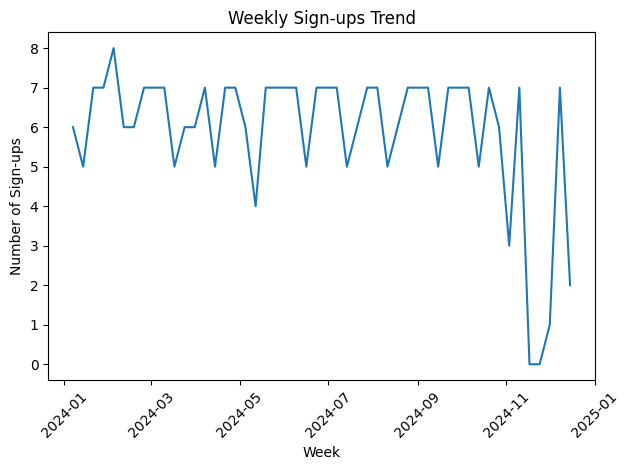

In [ ]:
# 📊 Visualization: Line chart (weekly trend)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(signups_per_week["signup_date"], signups_per_week["signups"])
plt.xlabel("Week")
plt.ylabel("Number of Sign-ups")
plt.title("Weekly Sign-ups Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**📊 Weekly Sign-ups Trend — Short Summary**

Weekly sign-ups remain largely stable throughout the year, typically ranging between 5 and 7 users per week, indicating consistent customer acquisition. There are minor fluctuations, with occasional peaks around 7–8 sign-ups and brief dips. A sharp drop near the end of the year suggests a possible seasonal effect, data gap, or temporary disruption that may require further investigation.

This pattern indicates a steady acquisition baseline with no strong long-term upward or downward trend.

#### **b) Moving average (smooth noisy fluctuations)**

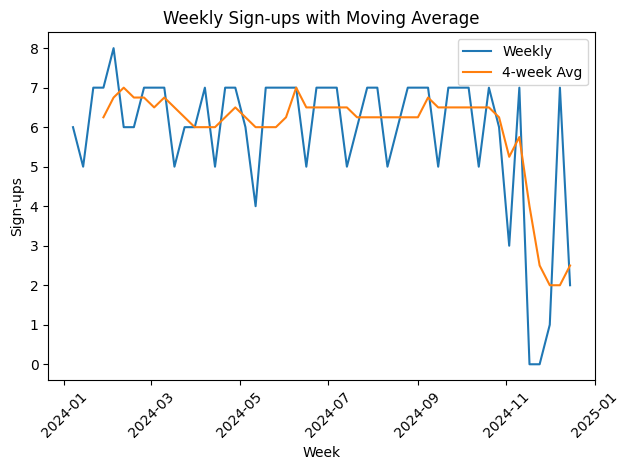

In [ ]:
# 📊 Visualization: 4-week moving average
signups_per_week["4_week_avg"] = (
    signups_per_week["signups"].rolling(window=4).mean()
)

plt.figure()
plt.plot(signups_per_week["signup_date"], signups_per_week["signups"], label="Weekly")
plt.plot(signups_per_week["signup_date"], signups_per_week["4_week_avg"], label="4-week Avg")
plt.xlabel("Week")
plt.ylabel("Sign-ups")
plt.title("Weekly Sign-ups with Moving Average")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**📉 Weekly Sign-ups with Moving Average — Short Summary**

The weekly sign-ups show small short-term fluctuations, but the 4-week moving average remains relatively stable around 6–7 sign-ups for most of the year, indicating a consistent underlying acquisition trend. Toward the end of the year, both the weekly counts and the moving average drop sharply, suggesting a potential seasonal slowdown, campaign pause, or data incompleteness that should be investigated further.

Overall, the moving average confirms that variability is mostly noise, with no major growth trend until the late-year decline.

#### **c) Week-over-week growth rate**

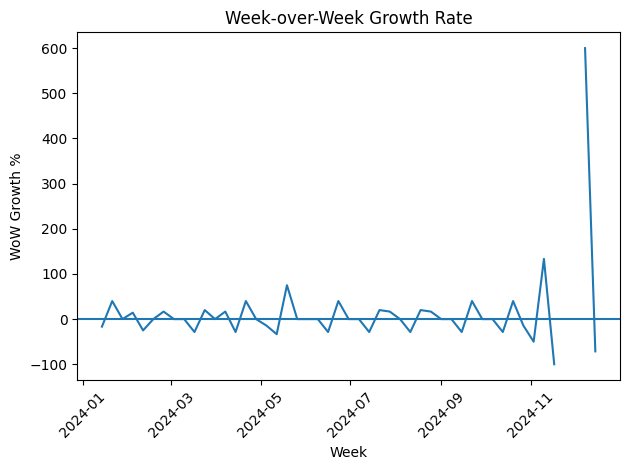

In [ ]:
# 📈 Analysis: Growth %
signups_per_week["wow_growth_pct"] = (
    signups_per_week["signups"].pct_change() * 100
)

signups_per_week[["signup_date", "wow_growth_pct"]]

# 📊 Visualization
plt.figure()
plt.plot(signups_per_week["signup_date"], signups_per_week["wow_growth_pct"])
plt.axhline(0)
plt.xlabel("Week")
plt.ylabel("WoW Growth %")
plt.title("Week-over-Week Growth Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**📈 Week-over-Week Growth Rate — Short Summary**

For most of the year, the week-over-week growth rate oscillates around 0%, indicating stable and consistent sign-up activity with no sustained acceleration or decline. Occasional positive and negative spikes reflect normal short-term variability rather than structural change.

The extreme spikes toward the end of the period (both sharply negative and positive) are caused by very low or zero sign-ups in the prior week, which exaggerates percentage changes. These values should be interpreted with caution and likely indicate seasonality, data gaps, or temporary disruptions rather than real growth surges.

Overall, growth is steady, with volatility increasing only when weekly volumes drop to very low levels.

#### **d) Identify peak & low weeks**

In [ ]:
max_week = signups_per_week.loc[
    signups_per_week["signups"].idxmax()
]

min_week = signups_per_week.loc[
    signups_per_week["signups"].idxmin()
]

max_week, min_week

(signup_date       2024-02-04 00:00:00
 signups                             8
 4_week_avg                       6.75
 wow_growth_pct              14.285714
 Name: 4, dtype: object,
 signup_date       2024-11-17 00:00:00
 signups                             0
 4_week_avg                        4.0
 wow_growth_pct                 -100.0
 Name: 45, dtype: object)

**📌 Interpretation of the Two Weekly Records**

	•	Week of 2024-02-04

This week recorded 8 sign-ups, which is above the recent trend (4-week average of 6.75). The +14.29% week-over-week growth indicates a moderate increase compared to the previous week, likely reflecting a short-term uplift (e.g., campaign effect or natural fluctuation).

	•	Week of 2024-11-17

This week shows 0 sign-ups, resulting in a −100% week-over-week growth. The 4-week average of 4.0 suggests this drop is abnormal relative to recent activity and likely due to seasonality, a temporary pause, or missing/incomplete data, rather than a true collapse in demand.

**Overall:** The February value represents a healthy positive deviation, while the November value is an outlier that should be treated with caution.

#### **e) Distribution of weekly sign-ups**

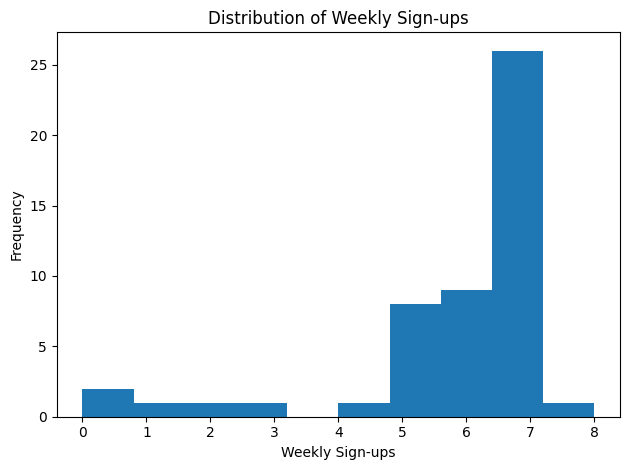

In [ ]:
plt.figure()
plt.hist(signups_per_week["signups"])
plt.xlabel("Weekly Sign-ups")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly Sign-ups")
plt.tight_layout()
plt.show()

**📊 Distribution of Weekly Sign-ups — Short Summary**

The distribution shows that most weeks cluster between 5 and 7 sign-ups, indicating a stable and predictable acquisition level. Occasional values below this range—including zero sign-ups—appear as outliers, likely driven by seasonality, operational pauses, or missing data rather than normal behavior.

**Overall**, the distribution is slightly left-skewed, with low-signup weeks being rare, **reinforcing that 5–7 sign-ups per week represents the typical baseline** for this dataset.

#### **f) Combination of weekly signups  with source (advanced but powerful)**

In [ ]:
# 📊 Analysis: Weekly sign-ups by source to see channel performance over time
weekly_by_source = (
    df
    .groupby([pd.Grouper(key="signup_date", freq="W"), "source"])
    .size()
    .reset_index(name="signups")
)

weekly_by_source.head()

,signup_date,source,signups
0,2024-01-07,Google,2
1,2024-01-07,Linkedin,1
2,2024-01-07,Youtube,2
3,2024-01-14,Facebook,2
4,2024-01-14,Google,1


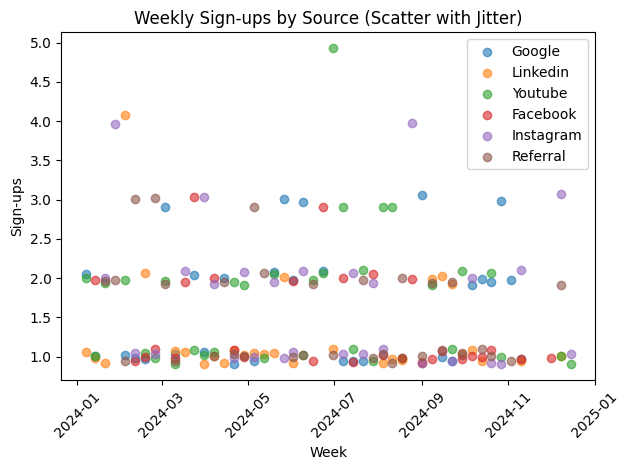

In [ ]:
# How each channel performs over time (weekly) scatter plot

import numpy as np

plt.figure()

for source in weekly_by_source["source"].dropna().unique():
    data = weekly_by_source[weekly_by_source["source"] == source]
    jitter = np.random.uniform(-0.1, 0.1, size=len(data))
    plt.scatter(
        data["signup_date"],
        data["signups"] + jitter,
        label=source,
        alpha=0.6
    )

plt.xlabel("Week")
plt.ylabel("Sign-ups")
plt.title("Weekly Sign-ups by Source (Scatter with Jitter)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**📊 Weekly Sign-ups by Source (Scatter Plot) — Short Summary**

The scatter plot shows that weekly sign-ups per source are generally low and stable, mostly clustering between 1 and 2 sign-ups per week across all channels. Occasional higher points (up to 4–5 sign-ups) indicate short-lived spikes, likely driven by specific campaigns or referrals rather than sustained growth.

No single source consistently outperforms others over time, suggesting a balanced acquisition mix where multiple channels contribute steadily but at low volume.

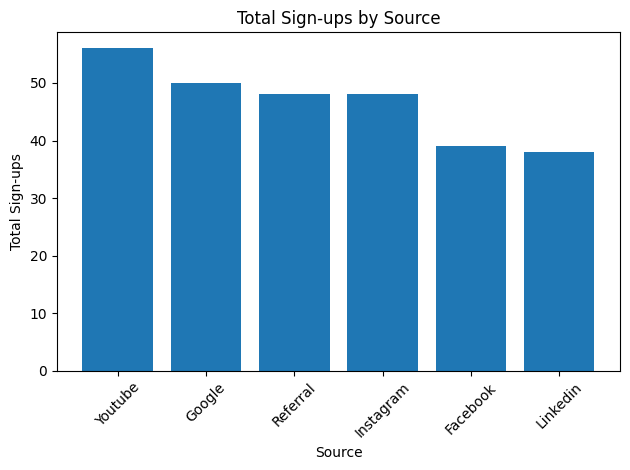

In [ ]:
# Bar chart: Total sign-ups by source (summary)
total_by_source = (
    weekly_by_source
    .groupby("source")["signups"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
plt.bar(total_by_source.index, total_by_source.values)
plt.xlabel("Source")
plt.ylabel("Total Sign-ups")
plt.title("Total Sign-ups by Source")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Bar chart: Total sign-ups by source (summary)**

YouTube is the top-performing acquisition channel in terms of total sign-ups, followed closely by Google, Referral, and Instagram, which contribute at similar levels. Facebook and LinkedIn generate comparatively fewer sign-ups, suggesting they may be lower-priority channels for future marketing investment or require optimization.

I analyzed weekly sign-ups using time-series aggregation, identified trends and variability with moving averages, measured week-over-week growth, and visualized distributions to understand acquisition stability and performance patterns.

### **3.2 Sign-ups by source, region, and plan_selected (value_counts)**

Frequency distribution of sign-ups by category.

In [ ]:
print('value_counts for source',df["source"].value_counts(dropna=False))
print('value_counts for region',df["region"].value_counts(dropna=False))
print('value_counts for plan_selected',df["plan_selected"].value_counts(dropna=False))


value_counts for source source
Youtube      58
Google       50
Instagram    49
Referral     49
Facebook     40
Linkedin     39
<NA>         15
Name: count, dtype: Int64
value_counts for region region
North      65
East       61
South      59
West       46
Central    39
Unknown    30
Name: count, dtype: Int64
value_counts for plan_selected plan_selected
Premium    100
Pro         94
Basic       92
NaN          8
<NA>         6
Name: count, dtype: int64


In [ ]:
# Helper to make plots consistent
import matplotlib.pyplot as plt
import pandas as pd

# Helper to make plots consistent
def plot_bar(series, title, xlabel, ylabel="Count", horizontal=False):
    s = series.copy()
    s.index = s.index.astype(str)

    plt.figure()
    if horizontal:
        s = s.sort_values(ascending=True)
        plt.barh(s.index, s.values)
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    else:
        s = s.sort_values(ascending=False)
        plt.bar(s.index, s.values)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=45, ha="right")

    plt.title(title)
    plt.tight_layout()
    plt.show()

#### **a) Source — Horizontal bar (best for long labels)**

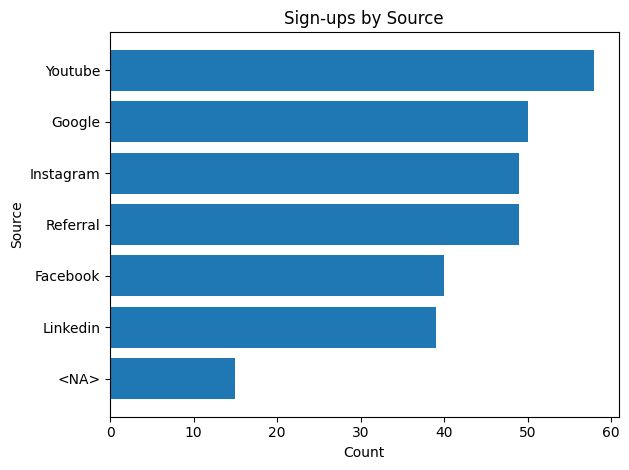

In [ ]:
source_counts = df["source"].value_counts(dropna=False)
plot_bar(source_counts, "Sign-ups by Source", xlabel="Source", horizontal=True)

**Summary -- Signup by sources**

YouTube is the strongest acquisition channel, followed closely by Google, Instagram, and Referral, which together form a reliable core for customer growth. Facebook and LinkedIn underperform, suggesting potential budget reallocation or campaign optimization, while the <NA> category highlights a tracking gap that could be improved to better measure marketing ROI.

#### **b) Region — Bar chart (vertical)**

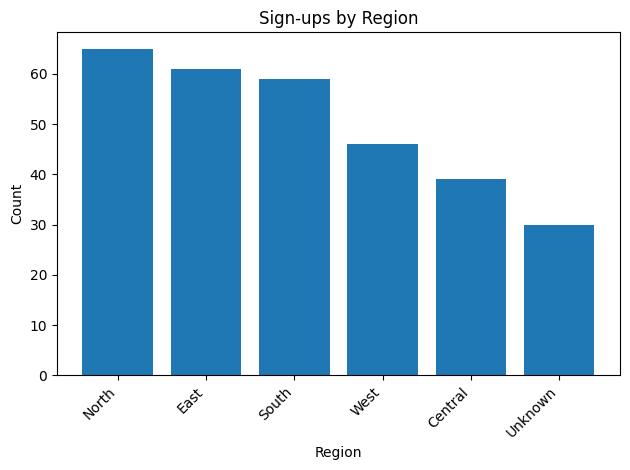

In [ ]:
region_counts = df["region"].value_counts(dropna=False)
plot_bar(region_counts, "Sign-ups by Region", xlabel="Region", horizontal=False)

**Summary Signups by regions**

The North, East, and South regions drive the majority of sign-ups, indicating strong market presence and higher demand in these areas. West, Central and Unknown regions underperform, suggesting opportunities for targeted regional campaigns and improved data capture to optimize geographic marketing strategy and resource allocation.

#### **c) Plan Selected — Bar chart (vertical)**

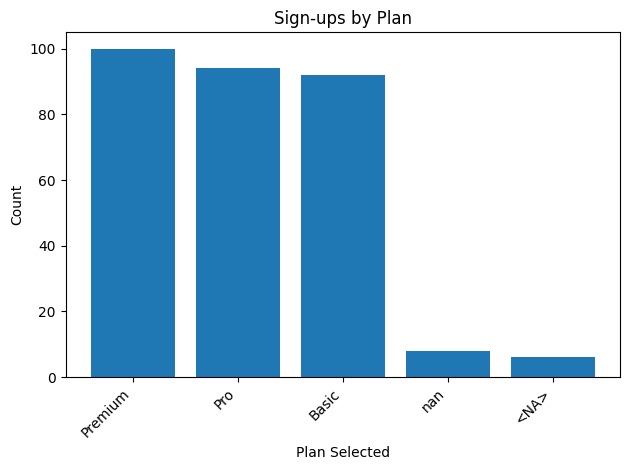

In [ ]:
plan_counts = df["plan_selected"].value_counts(dropna=False)
plot_bar(plan_counts, "Sign-ups by Plan", xlabel="Plan Selected", horizontal=False)

**Summary Signups by Plan_selected**

Premium is the most selected plan, closely followed by Pro and Basic, indicating balanced demand across pricing tiers and strong willingness to pay. The presence of missing or undefined plan selections highlights a data quality or onboarding issue that could impact revenue tracking and should be addressed to ensure accurate conversion and pricing analysis.

### **3.3 Marketing opt-in counts by gender (groupby)**

Shows how marketing consent differs by gender.

In [ ]:
marketing_by_gender = (
    df
    .groupby(["gender", "marketing_opt_in"]) # Groups rows by gender and marketing consent
    .size() # Counts rows per group combination
    .reset_index(name="count") # Makes output readable as a DataFrame
)
marketing_by_gender

,gender,marketing_opt_in,count
0,Female,No,47
1,Female,Yes,45
2,Male,No,50
3,Male,Yes,38
4,Non-Binary,No,20
5,Non-Binary,Yes,19
6,Other,No,32
7,Other,Yes,24


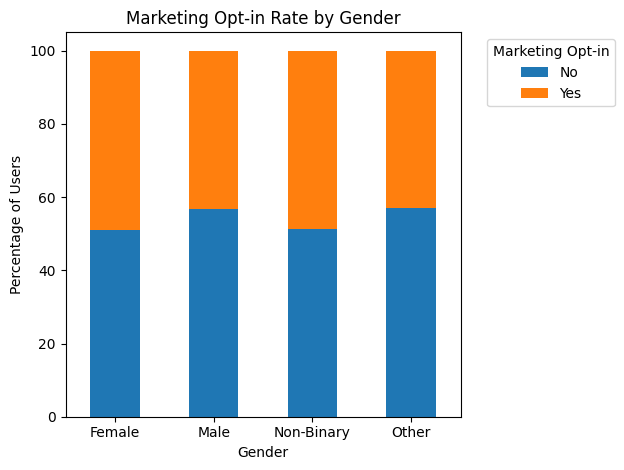

In [ ]:
import matplotlib.pyplot as plt

# Pivot to get marketing_opt_in counts per gender
pivot_df = marketing_by_gender.pivot(
    index="gender",
    columns="marketing_opt_in",
    values="count"
).fillna(0)

# Convert counts to percentages
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot 100% stacked bar chart
percent_df.plot(kind="bar", stacked=True)

plt.xlabel("Gender")
plt.ylabel("Percentage of Users")
plt.title("Marketing Opt-in Rate by Gender")
plt.legend(title="Marketing Opt-in", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**📈 Business Insights**

•	Opt-in rates are fairly balanced across all genders, indicating no strong gender-based resistance to marketing communications.

•	Male and Female users show slightly higher opt-out counts, suggesting messaging or channel relevance could be refined to improve engagement for these larger segments.

•	Non-Binary and Other groups have smaller but proportionally similar opt-in behavior, highlighting inclusivity while indicating limited volume impact.

**🎯 Business Impact**

•	Marketing strategies can remain broadly inclusive without heavy gender-based segmentation.

•	Optimization efforts should focus on message quality and timing, not demographic exclusion.

•	Improving opt-in conversion even slightly among Male and Female users could yield the largest absolute growth in reachable audience.


### **3.4 Age summary statistics**

A quick numeric age quality + distribution summary.

In [ ]:
age_summary = {
    "min_age": df["age"].min(), # youngest
    "max_age": df["age"].max(), # and oldest users
    "mean_age": df["age"].mean(), # avg age
    "median_age": df["age"].median(),# middle value (robust to outliers)
    "null_count": df["age"].isna().sum()
}
age_summary

{'min_age': np.int64(21),
 'max_age': np.int64(60),
 'mean_age': np.float64(35.42666666666667),
 'median_age': np.float64(34.0),
 'null_count': np.int64(0)}

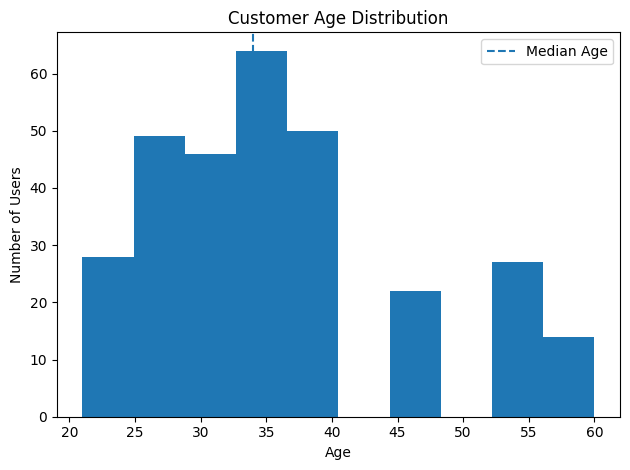

In [ ]:
# 📊 Recommended Plot: Age Distribution (Histogram + Median)
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["age"], bins=10)
plt.axvline(df["median_age"] if "median_age" in df else df["age"].median(), linestyle="--", label="Median Age")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Customer Age Distribution")
plt.legend()
plt.tight_layout()
plt.show()

**📊 Customer Age Distribution (Histogram)**

The histogram shows that most customers fall between their late 20s and late 30s, with a clear peak around the mid-30s, aligning with the median age. There are fewer users at the extremes (early 20s and late 50s–60s), indicating the core audience is working-age adults.

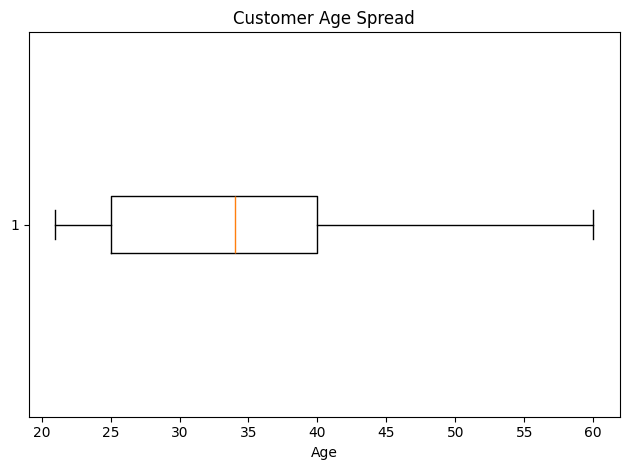

In [ ]:
# (Optional but powerful) Boxplot for quick summary
plt.figure()
plt.boxplot(df["age"], vert=False)
plt.xlabel("Age")
plt.title("Customer Age Spread")
plt.tight_layout()
plt.show()

**📦 Customer Age Spread (Boxplot)**

The boxplot confirms a moderate age spread with the middle 50% of customers clustered roughly between the mid-20s and around 40, and no extreme outliers. This suggests a stable and well-defined target demographic without heavy skew from very young or very old users.

**💼 Business Insights**

•	The core customer base lies in the early 25s to late 30s range, representing working professionals with stable purchasing power.

•	The absence of missing age values improves confidence in demographic segmentation and personalization.

•	Marketing, pricing, and product messaging should primarily target career-focused adults, while secondary campaigns can explore expansion toward younger (early 20s) or older (50+) segments.

**🎯 Business impact**

•	Enables age-based personalization (content, pricing tiers, messaging tone)

•	Supports accurate audience targeting for paid campaigns

•	Reduces risk in demographic-driven decisions due to high data completeness

### **3.5 Conclusion on summary outputs (using pandas aggregations)**

**The analysis shows that weekly sign-ups** remain stable throughout the year, with only minor fluctuations and a brief drop toward the end, indicating a consistent acquisition baseline rather than strong growth or decline. **Sources** like YouTube, Google, Instagram, and Referral are the primary acquisition channels, while Facebook and LinkedIn contribute less, suggesting opportunities for channel optimization or budget reallocation.

**Regionally**, North, East,South and West account for the majority of users, highlighting strong market presence in these areas, while Central and Unknown regions indicate potential for targeted expansion and improved data capture. **Plan selection** is well balanced across Premium, Pro, and Basic, with Premium slightly leading, reflecting healthy demand across pricing tiers.

**Marketing opt-in behavior** is consistent across genders, with no significant demographic bias, implying that broad, inclusive campaigns are effective. **The age distribution** centers in the mid-30s, with a narrow spread and no missing values, identifying working professionals as the core customer segment and enabling reliable demographic targeting.

**Overall conclusion:** The business has a stable, diversified acquisition mix and a clearly defined core audience. Future impact can be maximized by optimizing underperforming channels, strengthening regional focus where demand is highest, improving tracking completeness, and fine-tuning messaging rather than major strategic shifts.

## **4. Answer Business Questions**

### **4.1 Which acquisition source brought in the most users last month?**

In [ ]:
import pandas as pd

# Ensure signup_date is datetime
df["signup_date"] = pd.to_datetime(df["signup_date"])

# Define last month based on latest date in data
last_date = df["signup_date"].max()
last_month_start = last_date - pd.DateOffset(months=1)

# Filter last month data
last_month_df = df[df["signup_date"] >= last_month_start]

# Count sign-ups by source
last_month_source_counts = (
    last_month_df["source"]
    .value_counts()
)

last_month_source_counts

,count
source,
Instagram,4
Youtube,2
Referral,2
Facebook,1
Linkedin,1


**Last month, Instagram** was the leading acquisition source by sign-up volume, suggesting it delivers the strongest short-term ROI among all channels.This indicates that Instagram  campaigns or organic reach were particularly effective compared to other channels during that time.

Marketing investment should prioritize Instagram in the short term, while analyzing campaign elements (content, targeting, timing) to replicate success across other channels like Google or Facebook.

### **4.2 Which region shows signs of missing or incomplete data?**

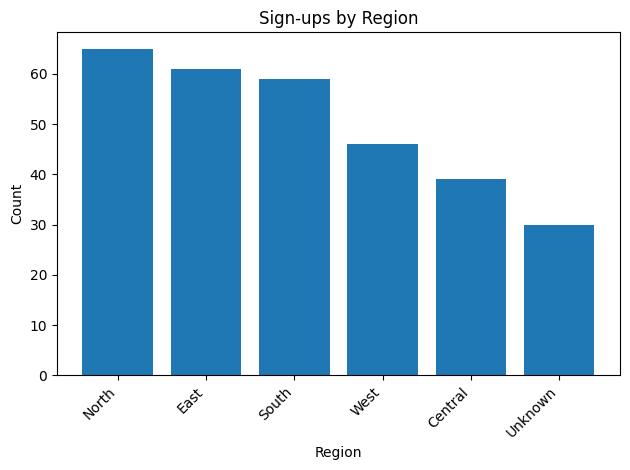

In [ ]:
region_counts = df["region"].value_counts(dropna=False)
plot_bar(region_counts, "Sign-ups by Region", xlabel="Region", horizontal=False)

The **“Unknown” region** shows signs of missing or incomplete data.

**Explanation & impact:**

•	A noticeable number of records (30) are labeled as Unknown, indicating that region information was not captured or not properly recorded during signup.

•	This limits the accuracy of regional performance analysis and targeting, so improving region data capture (e.g., mandatory field, validation, or better tracking) would enhance geographic insights and decision-making.

### **4.3 Are older users more or less likely to opt in to marketing?**

/tmp/ipython-input-4026160475.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "marketing_opt_in"])


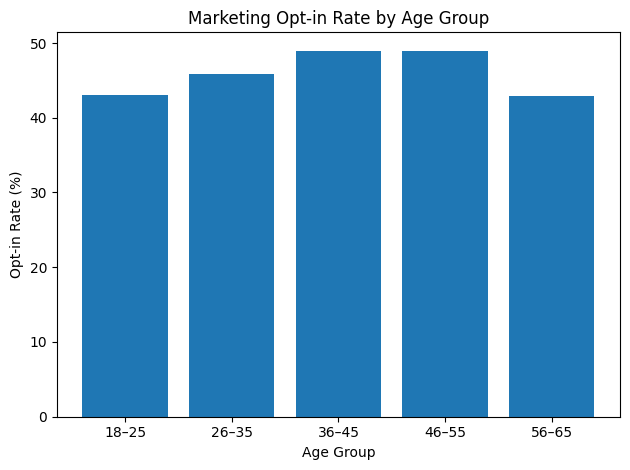

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create age groups
df["age_group"] = pd.cut(
    df["age"],
    bins=[18, 25, 35, 45, 55, 65],
    labels=["18–25", "26–35", "36–45", "46–55", "56–65"]
)

# calculate opt-in rate per age group
age_optin = (
    df
    .groupby(["age_group", "marketing_opt_in"])
    .size()
    .unstack(fill_value=0)
)

# calculate opt-in percentage
age_optin["opt_in_rate"] = (
    age_optin["Yes"] / age_optin.sum(axis=1) * 100
)

age_optin

# plot opt-in-rate
plt.figure()
plt.bar(age_optin.index.astype(str), age_optin["opt_in_rate"])
plt.xlabel("Age Group")
plt.ylabel("Opt-in Rate (%)")
plt.title("Marketing Opt-in Rate by Age Group")
plt.tight_layout()
plt.show()

**📊 Marketing Opt-in Rate by Age Group — Short Interpretation**

The opt-in rate is fairly consistent across all age groups, ranging from the low-40% to just under 50%, with mid-age users (36–55) showing the highest willingness to opt in. **Younger (18–25) and older (56–65) users** are slightly less likely to opt in, but the differences are small.

**Conclusion:** Age has a minimal impact on marketing opt-in behavior; engagement is driven more by message relevance and value than by age, so broad, inclusive campaigns are appropriate with minor tailoring for younger and older segments.

### **4.4 Which plan is most commonly selected, and by which age group?**

/tmp/ipython-input-550029944.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "plan_selected"])


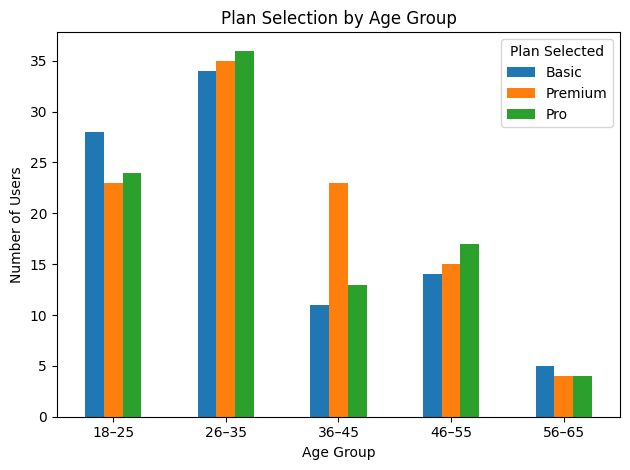

In [ ]:
# aggregate plan selection by age group
plan_by_age = (
    df
    .groupby(["age_group", "plan_selected"])
    .size()
    .reset_index(name="count")
)

plan_by_age

# Pivot for plotting
pivot_plan_age = plan_by_age.pivot(
    index="age_group",
    columns="plan_selected",
    values="count"
).fillna(0)

# Plot (grouped bar chart – clean & comparable)
import matplotlib.pyplot as plt

pivot_plan_age.plot(kind="bar")

plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Plan Selection by Age Group")
plt.xticks(rotation=0)
plt.legend(title="Plan Selected")
plt.tight_layout()
plt.show()


**📊 Plan Selection by Age Group — Interpretation**

•	Premium is the most commonly selected plan overall, with the highest adoption among users aged 26–35 and 36–45, indicating strong willingness to pay in early to mid-career stages.

•	Basic plans are more popular among the youngest users (18–25), reflecting higher price sensitivity, while Pro gains traction in the 46–55 group, suggesting demand for advanced features without the full Premium commitment.

**Business impact:**

Target Premium upsell and retention toward the 26–45 segment, use entry-level offers for younger users, and position Pro as a value-rich option for mature users seeking functionality at a moderate price.

### **4.5 Which plan’s users are most likely to contact support?**

answer is at end, section 5.5

## **5. Optional Stretch Task**


### **5.1 Load the support_tickets.csv dataset**

In [ ]:
# Loading the dataset from google drive (mount google drive, define path, load csv)

from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Datasets/support_tickets.csv"

import pandas as pd

df_spt = pd.read_csv(file_path)
df_spt.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ticket_id,customer_id,ticket_date,issue_type,resolved
0,TKT0000-1,CUST00203,2024-08-17,Billing,Yes
1,TKT0000-2,CUST00203,2024-07-22,Technical Error,Yes
2,TKT0000-3,CUST00203,2024-07-22,Other,Yes
3,TKT0001-1,CUST00266,2024-09-26,Account Setup,Yes
4,TKT0001-2,CUST00266,2024-10-09,Technical Error,No


In [ ]:
df_spt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ticket_id    123 non-null    object
 1   customer_id  123 non-null    object
 2   ticket_date  123 non-null    object
 3   issue_type   123 non-null    object
 4   resolved     123 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         298 non-null    object        
 1   name                291 non-null    object        
 2   email               266 non-null    object        
 3   signup_date         294 non-null    datetime64[ns]
 4   source              285 non-null    string        
 5   region              300 non-null    string        
 6   plan_selected       286 non-null    object        
 7   marketing_opt_in    289 non-null    object        
 8   age                 300 non-null    Int64         
 9   gender              286 non-null    object        
 10  email_missing_flag  300 non-null    bool          
 11  age_group           300 non-null    category      
dtypes: Int64(1), bool(1), category(1), datetime64[ns](1), object(6), string(2)
memory usage: 24.7+ KB


### **5.2 Join support ticket dataset to previous dataset on customer_id**

In [ ]:
df["customer_id"] = df["customer_id"].astype(str).str.strip()
df_spt["customer_id"] = df_spt["customer_id"].astype(str).str.strip()

In [ ]:
# Keeps all customers, even those without support tickets.
df_joined = df.merge(
    df_spt,
    on="customer_id",
    how="left"
)

df_joined.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,email_missing_flag,age_group,ticket_id,ticket_date,issue_type,resolved
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,Unknown,Basic,No,34,Female,True,26–35,NaN,NaN,NaN,NaN
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,Linkedin,West,Basic,Yes,29,Male,False,26–35,NaN,NaN,NaN,NaN
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34,Non-Binary,False,26–35,NaN,NaN,NaN,NaN
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,Youtube,Unknown,Pro,No,40,Male,False,36–45,NaN,NaN,NaN,NaN
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,Linkedin,West,Premium,No,25,Other,False,18–25,NaN,NaN,NaN,NaN


In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         363 non-null    object        
 1   name                352 non-null    object        
 2   email               320 non-null    object        
 3   signup_date         357 non-null    datetime64[ns]
 4   source              342 non-null    string        
 5   region              363 non-null    string        
 6   plan_selected       345 non-null    object        
 7   marketing_opt_in    348 non-null    object        
 8   age                 363 non-null    Int64         
 9   gender              344 non-null    object        
 10  email_missing_flag  363 non-null    bool          
 11  age_group           363 non-null    category      
 12  ticket_id           123 non-null    object        
 13  ticket_date         123 non-null    object        

### **5.3 Count how many customers contacted support within 2 weeks of sign-up**

In [ ]:
# ensure datetime after merge
df_joined["signup_date"] = pd.to_datetime(df_joined["signup_date"], errors="coerce")
df_joined["ticket_date"] = pd.to_datetime(df_joined["ticket_date"], errors="coerce")

After merging datasets, datetime columns can lose their pandas datetime dtype and become NumPy arrays or objects. Explicitly reconverting them ensures compatible datetime arithmetic.

In [ ]:
# Calculate days between signup and ticket

df_joined["days_to_ticket"] = (
    df_joined["ticket_date"] - df_joined["signup_date"]
).dt.days

In [ ]:
df_joined[["signup_date", "ticket_date"]].dtypes

,0
signup_date,datetime64[ns]
ticket_date,datetime64[ns]


In [ ]:
df_joined.tail(5)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,email_missing_flag,age_group,ticket_id,ticket_date,issue_type,resolved,days_to_ticket
358,CUST00297,Timothy Mclaughlin,NaN,2024-10-24,Instagram,West,Basic,Yes,60,NaN,True,56–65,TKT0054-1,2024-11-09,Other,Yes,16.0
359,CUST00297,Timothy Mclaughlin,NaN,2024-10-24,Instagram,West,Basic,Yes,60,NaN,True,56–65,TKT0054-2,2024-11-01,Account Setup,Yes,8.0
360,CUST00297,Timothy Mclaughlin,NaN,2024-10-24,Instagram,West,Basic,Yes,60,NaN,True,56–65,TKT0054-3,2024-11-13,Technical Error,Yes,20.0
361,CUST00298,Justin Mcintyre,justin98@mailhub.org,2024-10-25,Youtube,South,Premium,No,53,Male,False,46–55,NaN,NaT,NaN,NaN,NaN
362,CUST00299,Mr. Bruce Bridges,mr.99@example.com,2024-10-26,<NA>,North,Premium,Yes,29,Male,False,26–35,NaN,NaT,NaN,NaN,NaN


In [ ]:
within_2_weeks = df_joined[
    (df_joined["days_to_ticket"] >= 0) &
    (df_joined["days_to_ticket"] <= 14)
]

within_2_weeks["customer_id"].nunique()

47

**47 unique customers** contacted support within 2 weeks of sign-up

In [ ]:
within_2_weeks

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,email_missing_flag,age_group,ticket_id,ticket_date,issue_type,resolved,days_to_ticket
5,CUST00005,John Gonzales,john5@mailhub.org,2024-06-01,Facebook,South,Premium,No,34,Other,False,26–35,TKT0008-1,2024-06-04,Other,Yes,3.0
7,CUST00007,Michael Bailey,michael7@mailhub.org,2024-08-01,Youtube,Central,Pro,Yes,60,Other,False,56–65,TKT0036-1,2024-08-07,Billing,Yes,6.0
10,CUST00009,Cindy Anderson,NaN,2024-10-01,Google,East,Premium,No,29,Female,True,26–35,TKT0003-1,2024-10-03,Technical Error,No,2.0
27,CUST00024,Mitchell Kerr,mitchell24@mailhub.org,2024-01-25,<NA>,North,Pro,No,21,Female,False,18–25,TKT0033-2,2024-02-08,Other,Yes,14.0
28,CUST00024,Mitchell Kerr,mitchell24@mailhub.org,2024-01-25,<NA>,North,Pro,No,21,Female,False,18–25,TKT0033-3,2024-02-05,Login Issue,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,CUST00281,Andrew Parks,andrew81@inboxmail.net,2024-08-10,Youtube,Central,Basic,Yes,47,Male,False,46–55,TKT0026-1,2024-08-11,Account Setup,Yes,1.0
340,CUST00281,Andrew Parks,andrew81@inboxmail.net,2024-08-10,Youtube,Central,Basic,Yes,47,Male,False,46–55,TKT0026-2,2024-08-13,Billing,Yes,3.0
345,CUST00286,Bethany Campbell,bethany86@mailhub.org,2024-10-13,Google,North,Premium,Yes,21,Male,False,18–25,TKT0042-1,2024-10-19,Account Setup,Yes,6.0
356,CUST00295,Gary Smith,gary95@example.com,2024-10-22,Google,West,Premium,Yes,40,NaN,False,36–45,TKT0027-1,2024-11-01,Other,Yes,10.0


### **5.4 Summarise support activity by plan and region (Group by plan and region)**

In [ ]:
# Count total support tickets by plan & region
support_by_plan_region = (
    df_joined
    .groupby(["plan_selected", "region"])
    .agg(
        total_tickets=("ticket_id", "count"),
        unique_customers=("customer_id", "nunique")
    )
    .reset_index()
)

support_by_plan_region

,plan_selected,region,total_tickets,unique_customers
0,Basic,Central,2,12
1,Basic,East,11,21
2,Basic,North,3,14
3,Basic,South,14,28
4,Basic,Unknown,2,8
5,Basic,West,10,9
6,Premium,Central,6,10
7,Premium,East,1,17
8,Premium,North,6,25
9,Premium,South,2,16


**✍️ Short business summary (use this)**

Support activity varies significantly by plan and region. Pro and Basic users show higher support load in East and West regions, suggesting onboarding or product complexity issues in those markets. Premium users generate comparatively fewer tickets per customer, indicating better product stability or support readiness at higher tiers.

**Impact:**

Focus support improvements and documentation on Pro and Basic plans in East and West, while maintaining Premium service quality to protect high-value customers.

**📊 Heatmap code (clean & meaningful)**

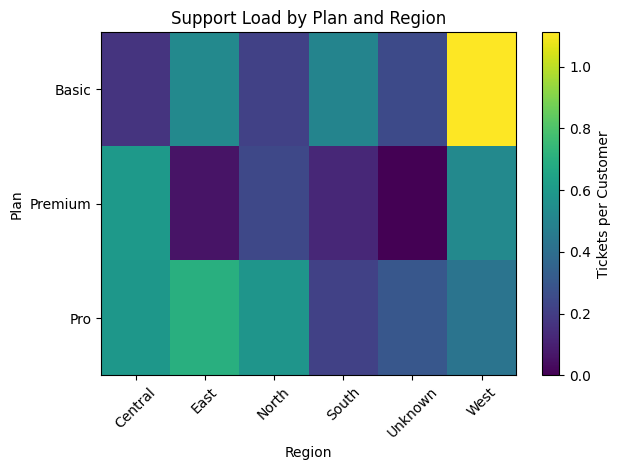

In [ ]:
support_by_plan_region["tickets_per_customer"] = (
    support_by_plan_region["total_tickets"] /
    support_by_plan_region["unique_customers"]
)
heatmap_df = support_by_plan_region.pivot(
    index="plan_selected",
    columns="region",
    values="tickets_per_customer"
)
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(heatmap_df, aspect="auto")
plt.colorbar(label="Tickets per Customer")
plt.xticks(range(len(heatmap_df.columns)), heatmap_df.columns, rotation=45)
plt.yticks(range(len(heatmap_df.index)), heatmap_df.index)
plt.xlabel("Region")
plt.ylabel("Plan")
plt.title("Support Load by Plan and Region")
plt.tight_layout()
plt.show()

Support load is highest for Basic users in the West and for Pro users in the East and Central regions, indicating localized onboarding or product complexity issues. Premium users consistently show lower tickets per customer, suggesting better product stability and/or higher service readiness for top-tier customers.

### **5.5 Which plan’s users are most likely to contact support?**

In [ ]:
# aggregate tickets per customer by plan
support_by_plan = (
    support_by_plan_region
    .groupby("plan_selected")
    .agg(
        total_tickets=("total_tickets", "sum"),
        total_customers=("unique_customers", "sum")
    )
)

support_by_plan["tickets_per_customer"] = (
    support_by_plan["total_tickets"] /
    support_by_plan["total_customers"]
)

support_by_plan

,total_tickets,total_customers,tickets_per_customer
plan_selected,,,
Basic,42,92,0.456522
Premium,26,100,0.260000
Pro,47,94,0.500000


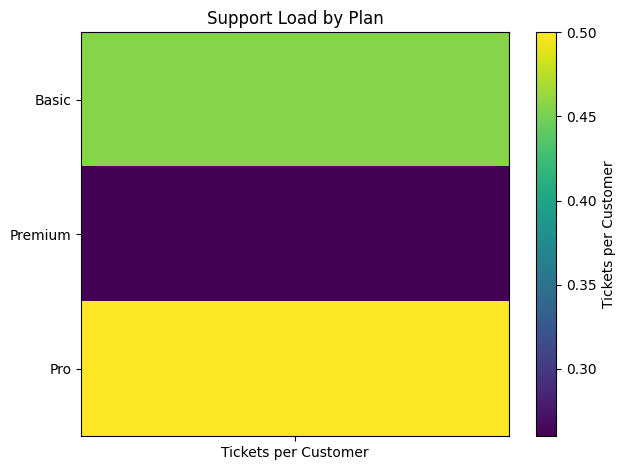

In [ ]:
# Heat map
heatmap_plan = support_by_plan[["tickets_per_customer"]]

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(heatmap_plan, aspect="auto")
plt.colorbar(label="Tickets per Customer")

plt.yticks(range(len(heatmap_plan.index)), heatmap_plan.index)
plt.xticks([0], ["Tickets per Customer"])

plt.title("Support Load by Plan")
plt.tight_layout()
plt.show()

**📊 Support Load by Plan — Interpretation**

The heatmap shows that **Pro plan users (50%)** have the highest tickets per customer, making them the most likely to contact support. **Basic users (45%)** exhibit a moderate support load, while **Premium users (26%)** generate the fewest support requests per customer, indicating smoother usage or better onboarding at the highest tier.

**Business impact:**

Prioritize support resources and proactive guidance for Pro users, maintain Premium service quality to protect high-value customers, and address specific friction points in the Basic plan to reduce avoidable support demand.

### **5.6 Best plot: Customer Age Distribution by Source (Boxplot)**

<Figure size 640x480 with 0 Axes>

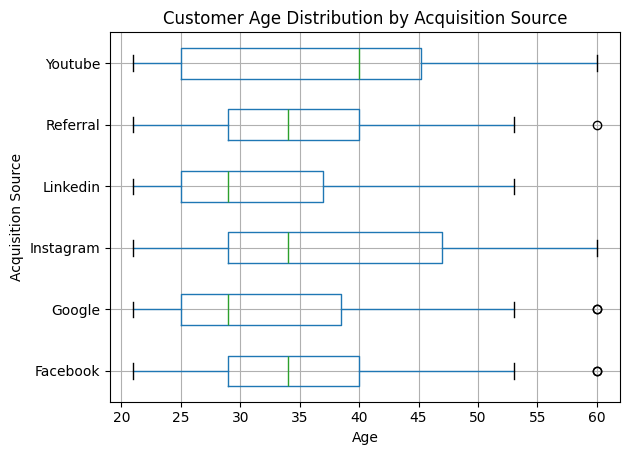

In [ ]:
import matplotlib.pyplot as plt

# Drop rows with missing age or source
plot_df = df.dropna(subset=["age", "source"])

plt.figure()
plot_df.boxplot(
    column="age",
    by="source",
    vert=False
)

plt.xlabel("Age")
plt.ylabel("Acquisition Source")
plt.title("Customer Age Distribution by Acquisition Source")
plt.suptitle("")  # remove automatic pandas title
plt.tight_layout()
plt.show()

**Explanation & Insight**

The boxplot shows clear age differences by acquisition source: Instagram and YouTube skew younger with wider age spreads, while LinkedIn and Referral attract relatively older, more professional users. Google and Facebook sit in the middle, bringing in a balanced age mix with moderate variability.

**Business Insight**

Different channels naturally align with different customer life stages, indicating that channel performance is driven as much by audience fit as by spend.

**Recommendation**

Align messaging and offers by channel—youth-focused content on Instagram/YouTube and professional, value-driven messaging on LinkedIn/Referral—to improve conversion and ROI.

In [ ]:
df.head(2)


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,email_missing_flag,age_group
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,Unknown,Basic,No,34,Female,True,26–35
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,Linkedin,West,Basic,Yes,29,Male,False,26–35


### **5.7 Customer Plan selection by age and acquision source**

/tmp/ipython-input-1245417814.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "source"])
/tmp/ipython-input-1245417814.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "source"])
/tmp/ipython-input-1245417814.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "source"])
/tmp/ipython-input-1245417814.py:15: FutureWarning: The default of observe

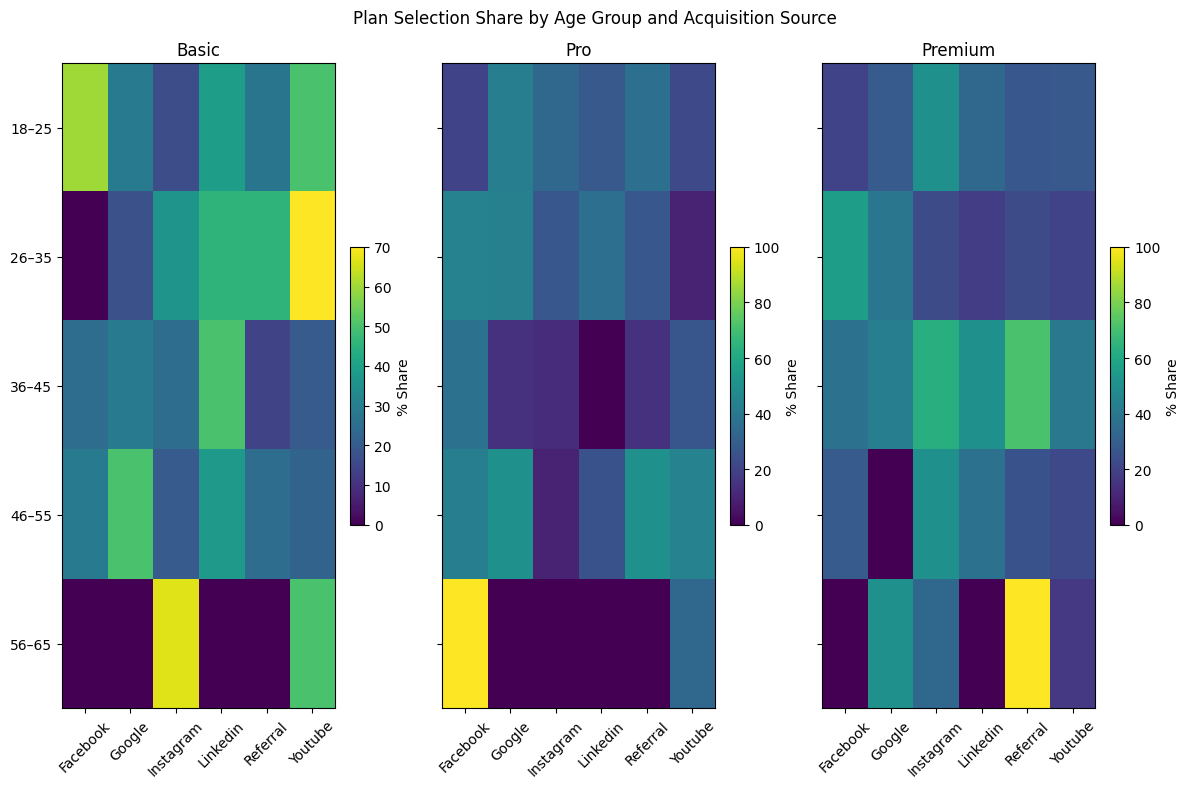

In [ ]:
total_counts = (
    df
    .groupby(["age_group", "source"])
    .size()
)
import matplotlib.pyplot as plt

plans = ["Basic", "Pro", "Premium"]

plt.figure(figsize=(12, 8))

for i, plan in enumerate(plans, 1):
    plan_counts = (
        df[df["plan_selected"] == plan]
        .groupby(["age_group", "source"])
        .size()
    )

    plan_pct = (plan_counts / total_counts * 100).reset_index(name="pct")

    heatmap_df = plan_pct.pivot(
        index="age_group",
        columns="source",
        values="pct"
    ).fillna(0)

    plt.subplot(1, 3, i)
    plt.imshow(heatmap_df, aspect="auto")
    plt.title(plan)
    plt.xticks(range(len(heatmap_df.columns)), heatmap_df.columns, rotation=45)
    plt.yticks(range(len(heatmap_df.index)), heatmap_df.index if i == 1 else [])
    plt.colorbar(label="% Share", fraction=0.046)

plt.suptitle("Plan Selection Share by Age Group and Acquisition Source")
plt.tight_layout()
plt.show()

**Basic Plan**

Basic adoption is strongest among younger users (18–25), particularly from Facebook, Instagram, and YouTube, indicating high price sensitivity and early-stage usage. This suggests Basic works well as an entry plan driven by social and video-based acquisition channels.

⸻

**Pro Plan**

The Pro plan shows a more evenly distributed adoption across age groups, with noticeable strength in the 26–45 segment, especially from Google and Referral sources. This indicates Pro acts as a transition plan for users seeking advanced features without committing to Premium pricing.

⸻

**Premium Plan**

Premium adoption peaks in the 26–45 and 46–55 age groups, with strong contributions from LinkedIn, Google, and Referral, reflecting professional and higher-value users. This highlights Premium as the preferred choice for mid- to late-career users acquired through more trust- and intent-driven channels.

⸻

**Overall Takeaway**

Plan preference is clearly influenced by both age and acquisition source, reinforcing the importance of channel- and age-specific pricing and messaging strategies to maximize conversion and lifetime value.

## **6.Recommendations**

	•	Prioritize high-performing channels and core age segments

Allocate marketing spend toward YouTube, Google, and Instagram, which drive the highest sign-ups, and focus messaging on users aged 26–50, the most engaged and highest-value segment. Since marketing opt-in varies little by age, use broad, inclusive campaigns with light age-specific customization.

	•	Adopt an age-based pricing and upsell strategy

Target Premium upsells to users aged 26–45 with value- and productivity-focused messaging. Use Basic as an entry plan for 18–25 users through free trials or discounts, and position Pro as a cost-effective step-up for 46–55 users seeking advanced features without Premium pricing.

	•	Improve onboarding and support for Pro users

As Pro users are most likely to contact support, enhance onboarding, in-app guidance, and Pro-specific FAQs to reduce early friction and support demand while improving satisfaction.

	•	Strengthen data capture and regional targeting

Reduce “Unknown” region entries through better sign-up validation, and prioritize regional campaigns in North, East, and South, where demand is strongest, while testing localized strategies to grow underperforming regions.

## **7.Data Quality Improvement Summary**

The analysis identified missing values and inconsistent entries in several critical fields, including email, region, age, marketing consent, and key categorical variables. These issues can limit reliable segmentation, bias business insights, and reduce the effectiveness of reporting and modeling.

Data quality can be significantly improved by enforcing input validation at the point of data collection, standardizing categorical values during ingestion, and implementing automated checks to monitor missing and invalid data over time. Together, these measures will ensure more consistent, accurate, and trustworthy data for future analysis and decision-making.